# 建议
### **本节内容虽然是基础，但知识点较为全面系统，适合认真了解打基础，如需要快速入门可从`pyplot`库开始学习**

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 一个简单的例子
Matplotlib将数据绘制在**画布**`Figure`，每个画布都可以包含一个或多个**轴域**`Axes`(一个可以根据x-y坐标或极坐标图中的θ-r、3D坐标图中的x-y-z等指定点的区域）。使用`Axes`创建图形的最简单方法是使用[`pyplot.subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots). 然后我们可以使用[`Axes.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots)在轴上绘制一些数据

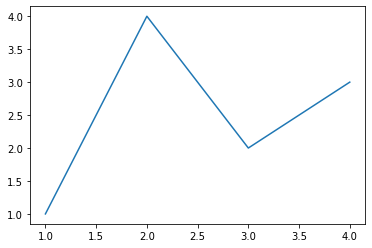

In [2]:
fig, ax = plt.subplots()  # 创建一个包含单个轴域的画布
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # 在轴域上画图

# 画布的组成
以下是Matplotlib画布的组件
<img src="https://matplotlib.org/stable/_images/anatomy.png" width="80%">

### [Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure)
**画布**跟踪所有子轴、包括**标题**、**图例**、**色条**等，还有嵌套的子画布。
创建新画布的最简单方法是使用pyplot：

<Figure size 432x288 with 0 Axes>

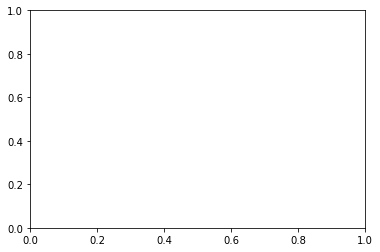

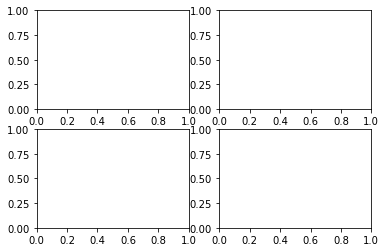

In [3]:
fig = plt.figure()  # 创建一个空画布
fig, ax = plt.subplots()  # 创建一个包含单个轴域的画布
fig, axs = plt.subplots(2, 2)  # 创建一个2x2的画布(包含4个轴域)
# 与画布一起创建轴通常很方便，但以后也可以手动添加轴。

### [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes)
一个**轴域**是画布上展示数据的地方，通常包含2个或3个**轴**(`Axis`)，注意**轴域**`Axes`和**轴**`Axis`的区别

### [Axis](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis)
在**轴**`Axis`上可以设置很多属性，**刻度**、**间距**、**大小**、**标签**等等

### [Artist](https://matplotlib.org/stable/api/artist_api.html#matplotlib.artist.Artist)
1.简单的`Artist`对象是标准的绘图元件，例如Line2D，Rectangle，Text，AxesImage等<br>
2.容器类型包含多个Artist对象使他们组织成一个整体例如Axis，Axes，Figure对象

利用Artist对象进行绘图的流程分为如下三步
1. 创建Figure对象
2. 为Figure对象创建一个或多个Axes对象
3. 调用Axes对象的方法来创建各种简单的Artist对象

Artist对象有许多属性控制其显示效果，例如Figure，Axes对象都有patch属性作为背景

# 画图函数的输入类型
绘图函数期望`numpy.array`或者 `numpy.ma.masked_array`作为输入，或是能传递给`numpy.asarray`的对象。但例如`pandas`数据对象和 `numpy.matrix` 等类似于数组（'array-like'）的类可能无法按预期工作。通常一般将其转换为`numpy.array`
```python
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
```
大多数方法可解析可寻址对象，如`dict`、`numpy.recarray`或`pandas.DataFrame`。 Matplotlib 允许提供<font color=red>data</font>关键字参数传递与x和y变量来画图。

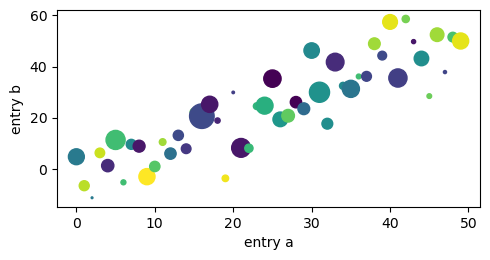

In [4]:
np.random.seed(19680801)  # 设置随机数生成器种子.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), dpi=100)  # dpi是设置图像分辨率
ax.scatter('a', 'b', c='c', s='d', data=data)  # 画散点图
ax.set_xlabel('entry a')  # 设置x轴标签
ax.set_ylabel('entry b')  # 设置y轴标签
plt.tight_layout() # 自动调整

# 编码风格

基本上有两种使用 Matplotlib 的方法：
- 显式创建**画布**和**轴域**，并在它们上调用方法(面向对象风格)
- 依靠`pyplot`自动创建和管理图形和轴，并使用`pyplot`函数进行绘图

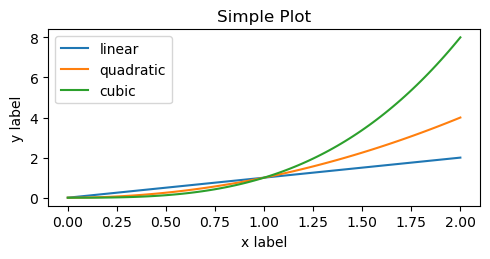

In [5]:
# 面向对象风格OO-style
x = np.linspace(0, 2, 100)
# 注意，即使在面向对象风格中，我们也是用`.pyplot.figure`来创建画布
fig, ax = plt.subplots(figsize=(5, 2.7), dpi=100)
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  
ax.set_ylabel('y label')  
ax.set_title("Simple Plot")  # 对一个轴域添加一个标题
ax.legend();  # 添加一个图例
plt.tight_layout() 

Matplotlib的文档和示例同时使用`OO-Style`和`pyplot`样式。官网建议使用OO风格，特别是对于复杂的绘图，旨在作为更大项目的一部分重用的函数和脚本。但是，pyplot 样式可以非常方便地进行快速交互工作。

### 使用辅助函数
如果你需要使用不同的数据集重复绘制相同的图，或者想要包装Matplotlib方法，可以使用下面推荐的函数。

In [6]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

使用它两次来填充两个子图：

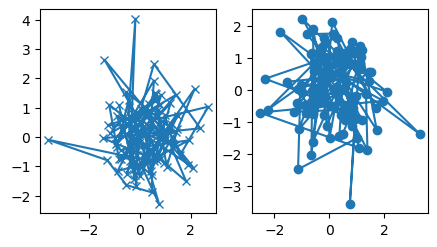

In [8]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7), dpi=100)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

# Styling Artists

大多数绘图方法都有`Artist`的样式选项，可以在调用绘图方法时访问，也可以从`Artist`上的`setter`访问。
1. 手动设置了`plot`创建的`Artist`的**颜色**、**线宽**和**线型**
2. 通过 `set_linestyle` 设置第二条线的**线型**

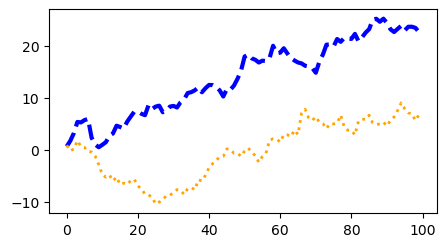

In [10]:
fig, ax = plt.subplots(figsize=(5, 2.7), dpi=100)
x = np.arange(len(data1))

# 第一种
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
# 第二种
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':');

### 颜色
Matplotlib有一个非常灵活的颜色数组请参阅颜色教程。eg：对于散点图，标记的边缘可以是与内部不同的颜色：

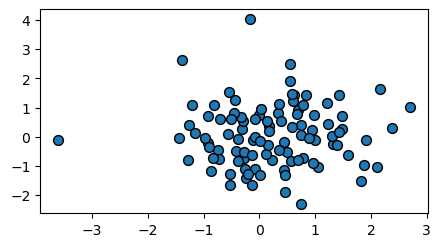

In [11]:
fig, ax = plt.subplots(figsize=(5, 2.7), dpi=100)
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k');

### 线宽、线型和标记大小
- **线宽**通常以印刷点为单位（1 pt = 1/72 英寸），适用于有描边线的`Artist`
- **线型**可以使用字符串“solid”、“dotted”、“dashed”或“dashdot”来定义简单的线型, 更多详细用法请参阅[**线条样式示例**](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)。
- **标记大小**取决于所使用的方法。`plot`以点为单位指定标记大小，通常是标记的“直径”或宽度。`scatter`将标记大小指定为与标记的可视区域大致成比例。
    - 有一系列标记样式可用作字符串代码(请参阅[makers](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers))，或者用户可以定义自己的[MarkerStyle](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib-markers-markerstyle)(请参阅[Marker reference](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html))

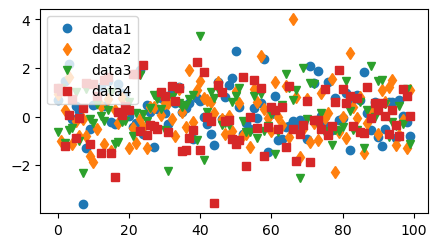

In [12]:
fig, ax = plt.subplots(figsize=(5, 2.7), dpi=100)
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend();

### 标记plots
#### 轴标签和文本
[`set_xlabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html#matplotlib.axes.Axes.set_xlabel)、[`set_ylabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html#matplotlib.axes.Axes.set_ylabel) 和 [`set_title`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html#matplotlib.axes.Axes.set_title) 用于在指定位置添加文本（有关更多讨论，请参阅[Text in Matplotlib Plots](https://matplotlib.org/stable/tutorials/text/text_intro.html)）。文本也可以使用[`text`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html#matplotlib.axes.Axes.text)直接添加到绘图中：

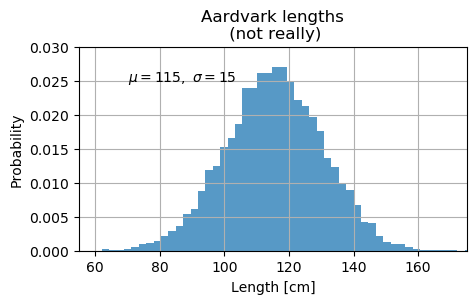

In [20]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), dpi=100)
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=1, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(70, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

所有文本函数都返回一个 matplotlib.text.Text 实例。就像上面的行一样，您可以通过将关键字参数传递给文本函数来自定义属性：

In [18]:
t = ax.set_xlabel('my data', fontsize=14, color='red')

[Text properties and layout](https://matplotlib.org/stable/tutorials/text/text_props.html)更详细地介绍了这些属性。

### 在文本中使用数学表达式
Matplotlib 接受任何文本表达式中的 TeX 方程表达式。例如在标题中写表达式 $σ_i=15$，你可以写一个用美元符号包围的 TeX 表达式：

In [21]:
ax.set_title(r'$\sigma_i=15$')

Text(0.5, 1, '$\\sigma_i=15$')

r 表示该字符串是原始字符串，并且不将反斜杠视为 python 转义。 Matplotlib 有一个内置的 TeX 表达式解析器和布局引擎，并提供自己的数学字体——有关详细信息，请参阅 [Writing mathematical expressions](https://matplotlib.org/stable/tutorials/text/mathtext.html)。也可以直接使用 LaTeX 来格式化您的文本并将输出直接合并到您的显示图形或保存的后记中 - 请参阅 [Text rendering with LaTeX](https://matplotlib.org/stable/tutorials/text/usetex.html)

### 注释
我们还可以在绘图上标注点，通常是通过将指向 xy 的箭头连接到 xytext 处的一段文本：
有关详细信息，请参阅[基本注释](https://matplotlib.org/stable/tutorials/text/annotations.html#annotations-tutorial)和[高级注释](https://matplotlib.org/stable/tutorials/text/annotations.html#plotting-guide-annotation)。更多示例也可以在 [Annotating Plots](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html) 中找到。

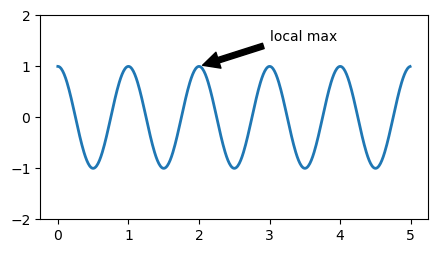

In [22]:
fig, ax = plt.subplots(figsize=(5, 2.7), dpi=100)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2);

### 图例
通常我们想用 `Axes.legend` 来识别线条或标记

更多的图例位置布局可以参考[Legend Guide](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html)

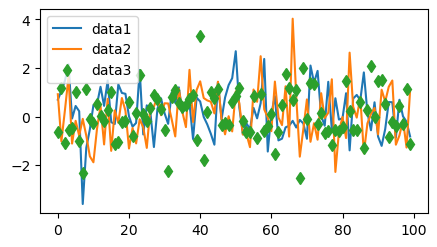

In [24]:
fig, ax = plt.subplots(figsize=(5, 2.7), dpi=100)
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend();